In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
#еще раз проверим на дубликаты
df.duplicated().value_counts()

False    8787
dtype: int64

In [4]:
df.info()
#формат столбца date_added не соответствует формату даты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8787 non-null   object
 1   type          8787 non-null   object
 2   title         8787 non-null   object
 3   director      8787 non-null   object
 4   country       8787 non-null   object
 5   date_added    8787 non-null   object
 6   release_year  8787 non-null   int64 
 7   rating        8787 non-null   object
 8   duration      8787 non-null   object
 9   listed_in     8787 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.6+ KB


In [5]:
#поменяем формат данных в столбце date_added
df_clean = df.copy()
df_clean.date_added = pd.to_datetime(df_clean.date_added)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8787 non-null   object        
 1   type          8787 non-null   object        
 2   title         8787 non-null   object        
 3   director      8787 non-null   object        
 4   country       8787 non-null   object        
 5   date_added    8787 non-null   datetime64[ns]
 6   release_year  8787 non-null   int64         
 7   rating        8787 non-null   object        
 8   duration      8787 non-null   object        
 9   listed_in     8787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.6+ KB


In [6]:
#Было замечено, что поле listed_in содержит от 1 до 3 категорий через ",".
#Создадим сначала пустые столбцы, чтобы их заполнить каждым значением категории.
#Создадим отдельную таблицу categories, содержащую поле listed_in в формате списка.
#Просмотрим каждую из строк и заполним пустые столбцы значениями из categories по индексу.
df_clean['listed_in1'] = 0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0
categories = df_clean['listed_in'].str.split(',')
i = 0
for i in range(8787):
    cats = categories[i]
    if len(cats) == 1:
        df_clean['listed_in1'][i] = categories[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
    if len(cats) == 2:
        df_clean['listed_in1'][i] = categories[i][0]
        df_clean['listed_in2'][i] = categories[i][1]
        df_clean['listed_in3'][i] = 0
    if len(cats) == 3:
        df_clean['listed_in1'][i] = categories[i][0]
        df_clean['listed_in2'][i] = categories[i][1]
        df_clean['listed_in3'][i] = categories[i][2]
df_clean.head()        

C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\1749022061.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = categories[i][0]
C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\1749022061.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\1749022061.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in3'][i]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


In [7]:
df_clean.groupby('duration').count().sort_values(by = 'show_id', ascending = False)
#заметим, что продолжительность фильмов и сериалов измеряется в разныx величинах: сезонах и минутах в зависимости от типа шоу - сериал или фильм. 

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,listed_in1,listed_in2,listed_in3
duration,,,,,,,,,,,,
1 Season,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790
2 Seasons,421,421,421,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
#Убедимся, что типов контента только 2
types = []
for i in range(len(df_clean)):
    if df_clean['type'][i] not in types:
        types.append(df_clean['type'][i])
types

['Movie', 'TV Show']

In [9]:
#Разделим базу на части - фильмы и шоу
df_movie = df_clean[df_clean['type'] == types[0]]
df_series = df_clean[df_clean['type'] == types[1]]

In [10]:
#Теперь можно корректировать продолжительность контента. 
#Для фильмов создадим новый столбец, который будет содержать только минуты.
#Для шоу - столбец, содержащий кол-во сезонов.

In [11]:
dur_movie = df_movie['duration'].str.split(' ', expand = True)
df_movie['duration_minutes'] = dur_movie[0]
df_movie['duration_minutes'] = pd.to_numeric(df_movie['duration_minutes']) #преобразуем в формат числа из формата строки
df_movie

C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\1351639567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = dur_movie[0]
C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\1351639567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = pd.to_numeric(df_movie['duration_minutes']) #преобразуем в формат числа из формата строки


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,s8232,Movie,The Bund,Not Given,Hong Kong,2018-09-20,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies",Action & Adventure,Dramas,International Movies,103
8704,s8269,Movie,The Darkest Dawn,Not Given,United Kingdom,2018-06-23,2016,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern...",Action & Adventure,Independent Movies,International Movies,75
8713,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies",Action & Adventure,Dramas,International Movies,136
8760,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,"Dramas, International Movies",Dramas,International Movies,0,89


In [12]:
dur_series = df_series['duration'].str.split(' ', expand = True)
df_series['duration_seasons'] = dur_series[0]
df_series['duration_seasons'] = pd.to_numeric(df_series['duration_seasons'])
df_series

C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\4167808504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series['duration_seasons'] = dur_series[0]
C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\4167808504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series['duration_seasons'] = pd.to_numeric(df_series['duration_seasons'])


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0,2
8783,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0,3
8784,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,1
8785,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0,1


In [13]:
#Удалим старые столбцы duration и заменим таблицы на обновленные
df_movie = df_movie.drop(columns = 'duration')
df_series = df_series.drop(columns = 'duration')

In [38]:
df_clean.loc[6210:6230]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
6210,s8415,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski",United States,2019-11-01,1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",Action & Adventure,Sci-Fi & Fantasy,0
6211,s8416,Movie,The Matrix Reloaded,"Lilly Wachowski, Lana Wachowski",United States,2019-11-01,2003,R,138 min,"Action & Adventure, Sci-Fi & Fantasy",Action & Adventure,Sci-Fi & Fantasy,0
6212,s8417,Movie,The Matrix Revolutions,"Lilly Wachowski, Lana Wachowski",United States,2019-11-01,2003,R,129 min,"Action & Adventure, Sci-Fi & Fantasy",Action & Adventure,Sci-Fi & Fantasy,0
6213,s8418,Movie,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",United States,2019-04-19,2018,TV-14,116 min,Documentaries,Documentaries,0,0
6214,s8419,Movie,The Mayor,Park In-je,South Korea,2017-09-30,2017,TV-MA,130 min,"Dramas, International Movies",Dramas,International Movies,0
6215,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,United States,2017-03-31,1944,TV-PG,40 min,"Classic Movies, Documentaries",Classic Movies,Documentaries,0
6216,s8421,Movie,The Men Who Stare at Goats,Grant Heslov,United States,2019-06-04,2009,R,94 min,Comedies,Comedies,0,0
6217,s8426,Movie,The Model,Mads Matthiesen,Denmark,2016-12-06,2016,TV-MA,104 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6218,s8427,Movie,The Monster,Bryan Bertino,United States,2019-01-09,2016,R,91 min,"Horror Movies, Independent Movies",Horror Movies,Independent Movies,0
6219,s8703,Movie,Waterschool,Tiffanie Hsu,United States,2018-07-25,2018,TV-G,68 min,Documentaries,Documentaries,0,0


In [39]:
df_clean.to_csv('netflix_clean.csv')

# Анализ и визуализация (all)

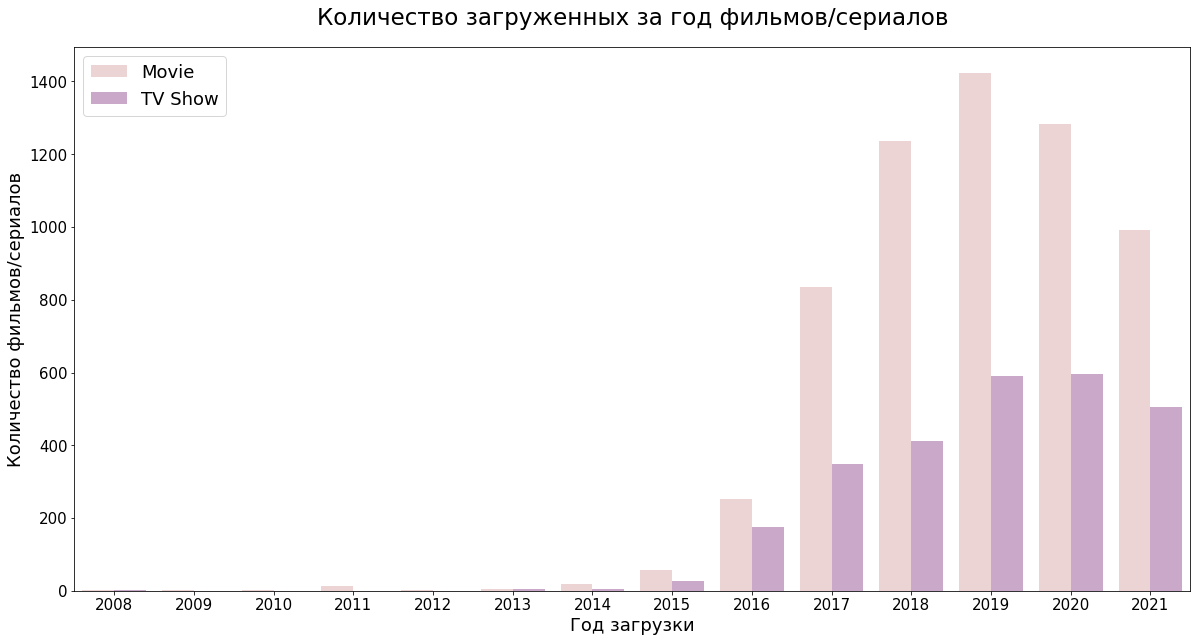

In [14]:
#Проанализируем изменение кол-ва фильмов и шоу, представленных на платформе Netflix, в зависимости от года приобретения фильма/шоу
plt.figure(figsize = [20, 10])

my_color = sns.cubehelix_palette(start = 1, rot = 1000)
series_movie = sns.countplot(x = df_clean['date_added'].dt.year, data = df_clean, hue = 'type', palette = my_color)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

series_movie.set_title('Количество загруженных за год фильмов/сериалов', fontsize = 23, y = 1.03)
series_movie.set_xlabel('Год загрузки', fontsize = 18)
series_movie.set_ylabel('Количество фильмов/сериалов', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 18)

#plt.legend([], [], frameon=False)

plt.savefig('years_all.png', transparent = True)

Устойчивый рост кол-ва сериалов и фильмов наблюдается с 2013 года. Большое падение произошло в 2020-2021 году, скорее всего из-за экономических последствий COVID.

До 2017 года количество сериалов и фильмов, загружаемых в потоковый сервис, было близко друг к другу. Однако после 2017 года компания начала вводить в сервис больше фильмов, более чем удвоив количество сериалов. Из чего можно сделать вывод, что именно фильмы пользуются большим спросом у зрителей.

In [15]:
#Выведем список уникальных стран
countries = []
for i in range(len(df_clean)):
    if df_clean['country'][i] not in countries:
        countries.append(df_clean['country'][i])
print(countries)

['United States', 'France', 'Brazil', 'United Kingdom', 'India', 'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa', 'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia', 'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand', 'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan', 'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania', 'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria', 'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland', 'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal', 'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia', 'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland', 'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union', 'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia', 'Guatemala', 'Jamaica', 'Somalia', 'Croatia', 'Jordan', 'Luxembourg', 'Senegal', 'Belarus', 'Puerto Rico', '

In [16]:
#Посчитаем, сколько фильмов и шоу присутствует на платформе в зависимости от страны выпуска (Not Given исключим)
countries = ['United States', 'France', 'Brazil', 'United Kingdom', 'India', 'Germany', 'Pakistan', 'China', 'South Africa', 'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia', 'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand', 'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan', 'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania', 'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria', 'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland', 'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal', 'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia', 'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland', 'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union', 'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia', 'Guatemala', 'Jamaica', 'Somalia', 'Croatia', 'Jordan', 'Luxembourg', 'Senegal', 'Belarus', 'Puerto Rico', 'Cyprus', 'Ukraine']
counter = []
for i in countries:
    counter.append(len(df_clean[df_clean['country'] == i]))
countries_new = pd.DataFrame({'index': range(len(countries)),
                             'countries': countries})
counter_new = pd.DataFrame({'index': range(len(countries)),
                             'counter': counter})
countries_join = countries_new.merge(counter_new)
countries_final = countries_join.sort_values('counter', ignore_index = True, ascending = False).loc[:9, 'countries':'counter']
print(countries_final)

        countries  counter
0   United States     3240
1           India     1056
2  United Kingdom      638
3        Pakistan      420
4          Canada      271
5           Japan      259
6     South Korea      214
7          France      213
8           Spain      182
9          Mexico      138


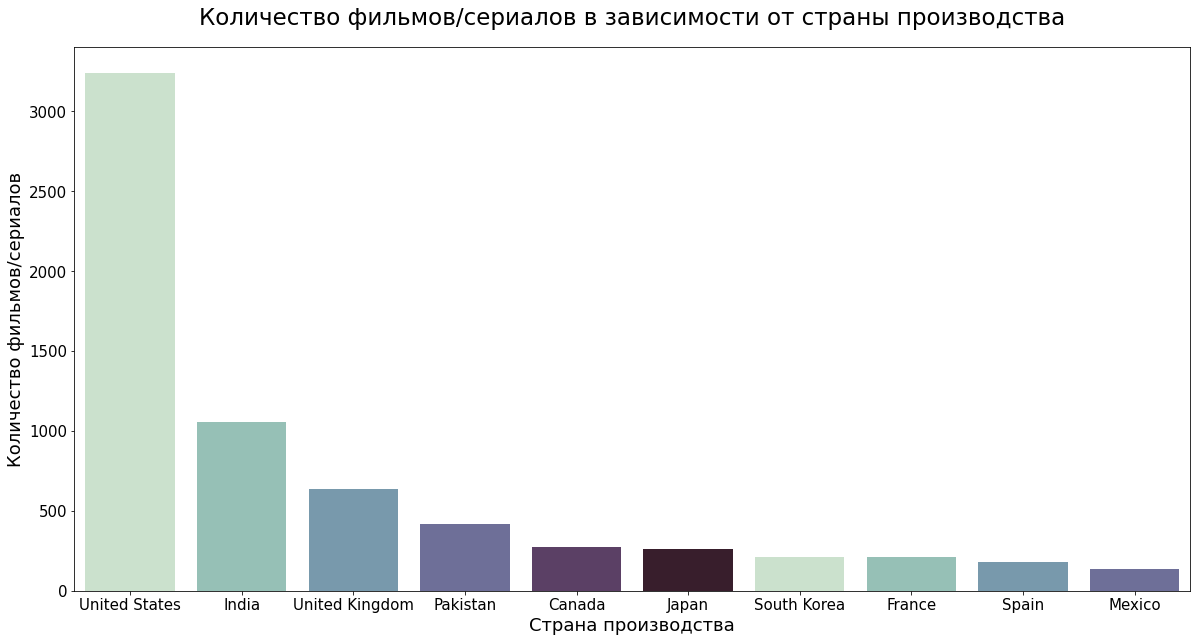

In [17]:
plt.figure(figsize = [20, 10])

my_color = sns.cubehelix_palette(start = 1, rot = -.8)
countries_count = sns.barplot(data = countries_final, x = countries_final['countries'], y = countries_final['counter'], 
                              palette = my_color)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

countries_count.set_title('Количество фильмов/сериалов в зависимости от страны производства', fontsize = 23, y = 1.03)
countries_count.set_xlabel('Страна производства', fontsize = 18)
countries_count.set_ylabel('Количество фильмов/сериалов', fontsize = 18)

plt.savefig('country_all.png', transparent = True)

# Анализ и визуализация по фильмам

In [18]:
#Посчитаем, сколько ФИЛЬМОВ присутствует на платформе в зависимости от страны выпуска (Not Given исключим)
countries = ['United States', 'France', 'Brazil', 'United Kingdom', 'India', 'Germany', 'Pakistan', 'China', 'South Africa', 'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia', 'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand', 'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan', 'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania', 'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria', 'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland', 'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal', 'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia', 'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland', 'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union', 'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia', 'Guatemala', 'Jamaica', 'Somalia', 'Croatia', 'Jordan', 'Luxembourg', 'Senegal', 'Belarus', 'Puerto Rico', 'Cyprus', 'Ukraine']
counter = []
for i in countries:
    counter.append(len(df_movie[df_movie['country'] == i]))
countries_new = pd.DataFrame({'index': range(len(countries)),
                             'countries': countries})
counter_new = pd.DataFrame({'index': range(len(countries)),
                             'counter': counter})
countries_join = countries_new.merge(counter_new)
countries_final = countries_join.sort_values('counter', ignore_index = True, ascending = False).loc[:9, 'countries':'counter']
print(counter)

[2395, 148, 60, 387, 975, 79, 71, 59, 35, 87, 96, 129, 80, 61, 56, 187, 76, 47, 15, 109, 17, 90, 9, 7, 15, 5, 22, 49, 7, 42, 5, 16, 7, 18, 10, 2, 20, 11, 1, 8, 82, 5, 1, 23, 22, 5, 4, 18, 8, 3, 4, 5, 11, 10, 3, 3, 1, 6, 1, 4, 1, 12, 3, 19, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


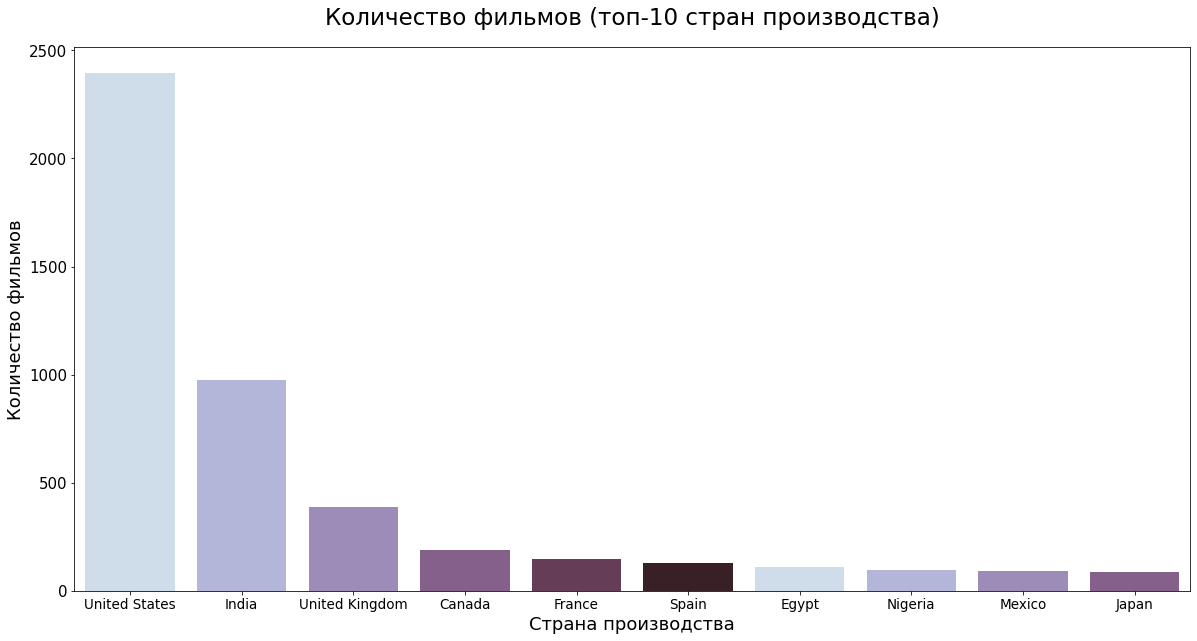

In [19]:
plt.figure(figsize = [20, 10])

my_color = sns.cubehelix_palette(start = 1, rot = -0.5)
countries_count = sns.barplot(data = countries_final, x = countries_final['countries'], y = countries_final['counter'], 
                              palette = my_color)

plt.xticks(fontsize = 13.5)
plt.yticks(fontsize = 15)
countries_count.set_title('Количество фильмов (топ-10 стран производства)', fontsize = 23, y = 1.03)
countries_count.set_xlabel('Страна производства', fontsize = 18)
countries_count.set_ylabel('Количество фильмов', fontsize = 18)

plt.savefig('country_movie.png', transparent = True)

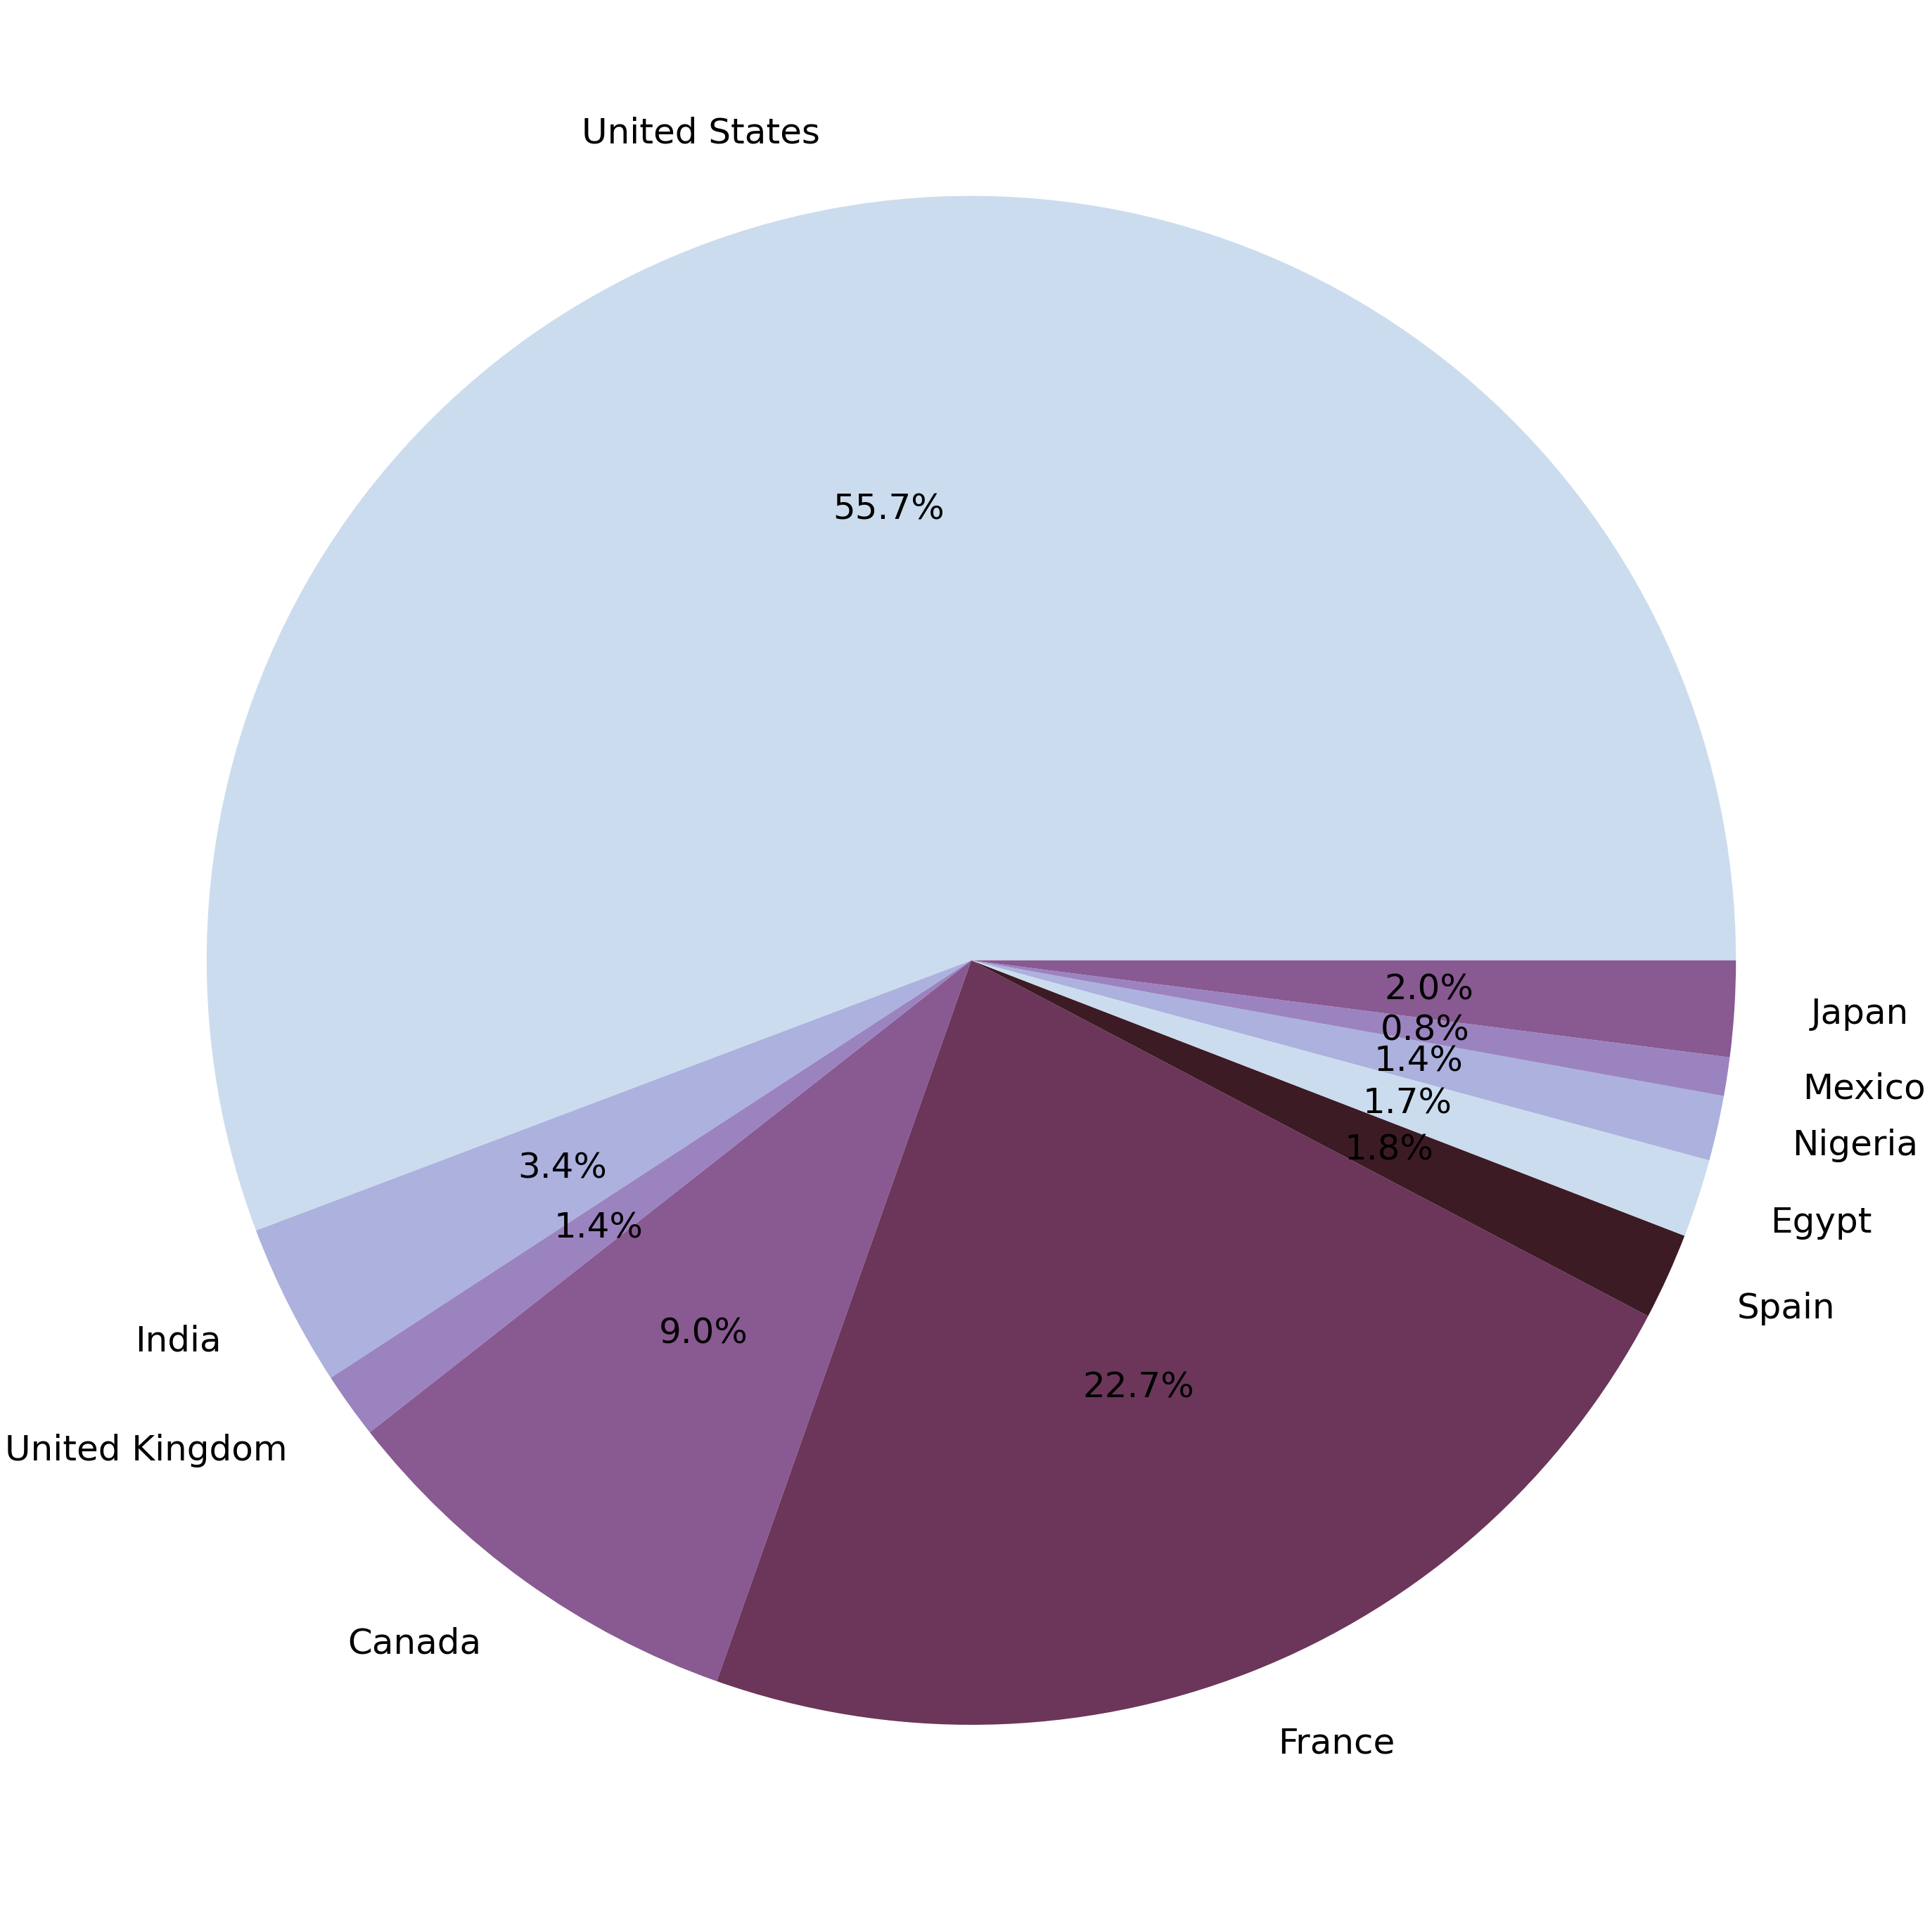

In [20]:
plt.figure(figsize = [50, 50])

data = counter[:10]
labels = countries_final['countries']

my_colors = sns.cubehelix_palette(start = 1, rot = -0.5)

plt.pie(counter[:10], labels = countries_final['countries'], colors = my_colors, autopct='%1.1f%%', textprops = {'fontsize': 50})

plt.savefig('country_movie_pie.png', transparent = True)

Как и в случае с сериалами Netflix, большинство фильмов также были сняты в Соединенных Штатах. Однако второй по популярности страной будет Индия, что, вероятно, связано с ее развитой киноиндустрией ("Болливуд").

Удивительно, но, несмотря на то, что Пакистан производит большинство сериалов для Netflix, он не входит в топ-10 стран, которые произвели большинство фильмов для Netflix.

C:\Users\Игорь\AppData\Local\Temp\ipykernel_2408\810581195.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_movie_f = df_movie_f[df_movie_f['country'] != 'Not Given'][df_movie_f['country'].isin(order2)]


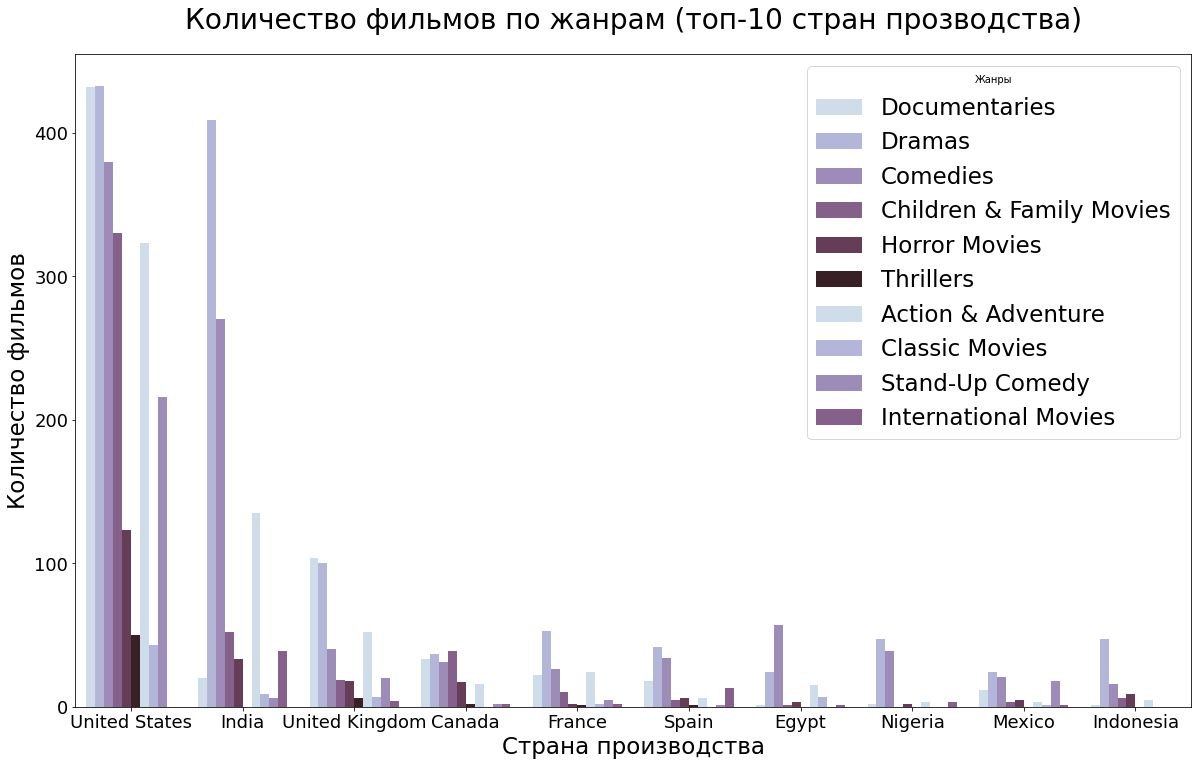

In [21]:
plt.figure(figsize = [20, 12])

order1 = df_movie.groupby('listed_in1').count().sort_values(by = 'show_id', ascending = False)[0:10].index
df_movie_f = df_movie[df_movie['listed_in1'].isin(order1)]
order2 = df_movie_f[df_movie_f['country'] != 'Not Given'].groupby('country').count().sort_values(by = 'show_id', ascending = False)[0:10].index
df_movie_f = df_movie_f[df_movie_f['country'] != 'Not Given'][df_movie_f['country'].isin(order2)]

my_color = sns.cubehelix_palette(start = 1, rot = -0.5)

a = df_movie['date_added'].dt.year
tv_g = sns.countplot(data = df_movie_f, x = 'country', hue = 'listed_in1', palette = my_color, order = order2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
tv_g.set_xlabel('Страна производства', fontsize = 23)
tv_g.set_ylabel('Количество фильмов', fontsize = 23)
tv_g.set_title('Количество фильмов по жанрам (топ-10 стран прозводства)', fontsize = 28, y = 1.03)
plt.legend(title = 'Жанры', loc = 'upper right', fontsize = 23)

plt.savefig('country_genre_movie.png', transparent = True)

Большинство фильмов, произведенных в США, были документальными фильмами, драмами и комедиями. В то время как в Индии это были в основном драмы и комедии.

В Великобритания самым популярным для производства жанром являются документальные фильмы.

Можно также отметить, что по сравнению с другими странами стендап-комедия является более популярным жанром только в США.

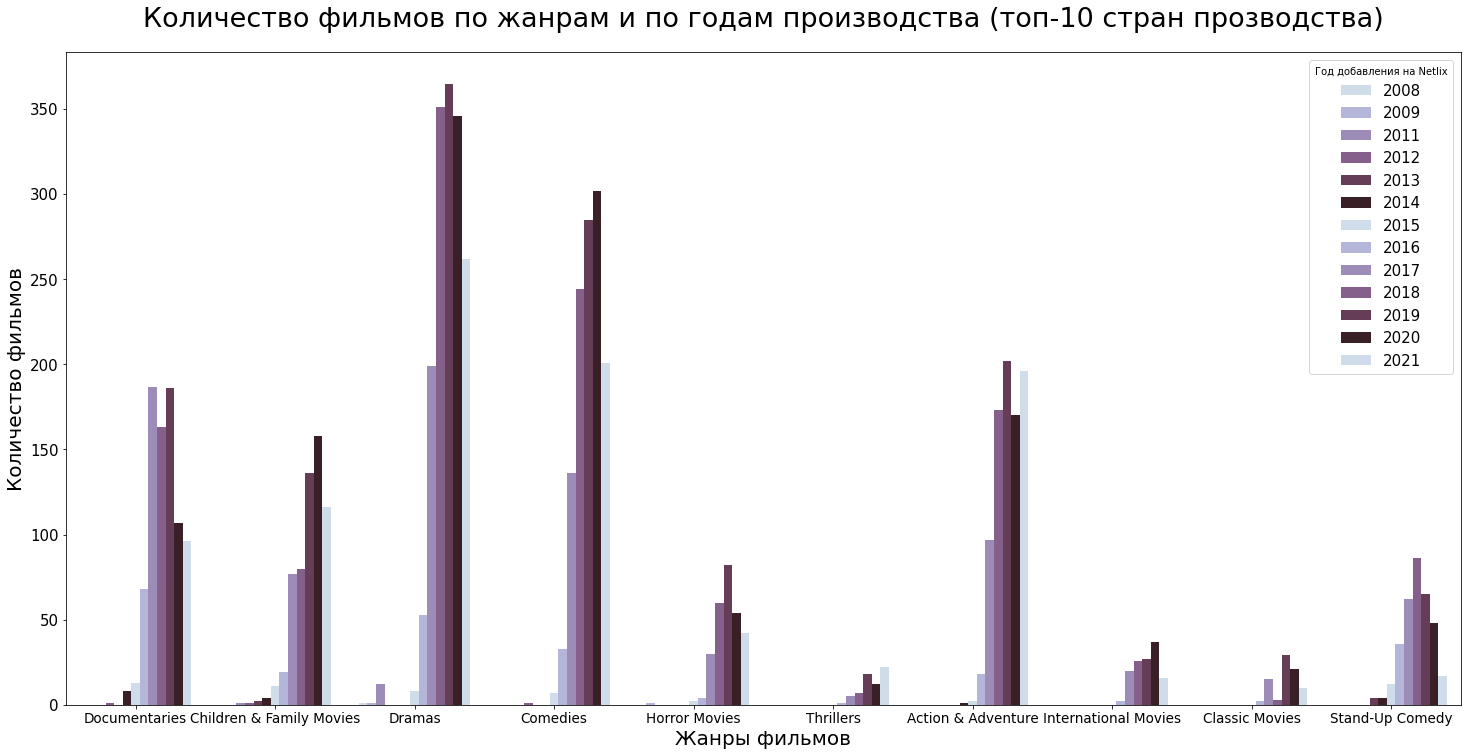

In [22]:
plt.figure(figsize = [25, 12])

my_color = sns.cubehelix_palette(start = 1, rot = -0.5)

sort_order = df_movie.groupby('listed_in1').count().sort_values(by = 'show_id',ascending = False)[0:10].index
df_movie_g = df_movie[df_movie['listed_in1'].isin(sort_order)]

movie_g = sns.countplot(data = df_movie_g, x = 'listed_in1', hue = df_movie_g['date_added'].dt.year, palette = my_color)
plt.xticks(fontsize = 13.5)
plt.yticks(fontsize = 15)
movie_g.set_xlabel('Жанры фильмов', fontsize = 20)
movie_g.set_ylabel('Количество фильмов', fontsize = 20)
movie_g.set_title('Количество фильмов по жанрам и по годам производства (топ-10 стран прозводства)', fontsize = 27, y = 1.03)
plt.legend(title = 'Год добавления на Netlix', fontsize = 15)

plt.savefig('genre_year_movie.png', transparent = True)

Большинство снятых фильмов были драмами, комедиями и боевиками с приключениями. 
Еще раз можно убедиться в том, что в 2020 произошло снижение количества произведенных фильмов почти по всем жанрам.

# Анализ и визуализация по сериалам


In [23]:
#Посчитаем, сколько СЕРИАЛОВ присутствует на платформе в зависимости от страны выпуска (Not Given исключим)
countries = ['United States', 'France', 'Brazil', 'United Kingdom', 'India', 'Germany', 'Pakistan', 'China', 'South Africa', 'Japan', 'Nigeria', 'Philippines', 'Australia', 'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand', 'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan', 'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania', 'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria', 'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland', 'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal', 'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia', 'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland', 'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union', 'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia', 'Guatemala', 'Jamaica', 'Somalia', 'Croatia', 'Jordan', 'Luxembourg', 'Senegal', 'Belarus', 'Puerto Rico', 'Cyprus', 'Ukraine']
counter = []
for i in countries:
    counter.append(len(df_series[df_series['country'] == i]))
countries_new = pd.DataFrame({'index': range(len(countries)),
                             'countries': countries})
counter_new = pd.DataFrame({'index': range(len(countries)),
                             'counter': counter})
countries_join = countries_new.merge(counter_new)
countries_final = countries_join.sort_values('counter', ignore_index = True, ascending = False).loc[:9, 'countries':'counter']
print(countries_final)

        countries  counter
0   United States      845
1        Pakistan      349
2  United Kingdom      251
3           Japan      172
4     South Korea      165
5          Canada       84
6           India       81
7          Taiwan       71
8          France       65
9       Australia       53


In [24]:
#plt.figure(figsize = [20, 25])

#my_color = sns.cubehelix_palette(start = 6, rot = -0.5)
#countries_count = sns.barplot(data = countries_final, x = countries_final['counter'], y = countries_final['countries'], palette = my_color)
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 18.5)
#countries_count.set_title('Количество сериалов (топ-10 стран прозводства)', fontsize = 20, y = 1.01)
#countries_count.set_ylabel('Страна производства', fontsize = 18.5)
#countries_count.set_xlabel('Количество сериалов', fontsize = 20)

#plt.savefig('country_series.png', transparent = True)

In [25]:
#plt.figure(figsize = [20, 25])

#order1 = df_series.groupby('listed_in1').count().sort_values(by = 'show_id', ascending = False)[0:10].index
#df_series_f = df_series[df_series['listed_in1'].isin(order1)]
#order2 = df_series_f.groupby('country').count().sort_values(by = 'show_id', ascending = False)[0:10].index
#df_series_f = df_series_f[df_series_f['country'].isin(order2)]

#my_color = sns.cubehelix_palette(start = 6, rot = -0.5)

#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 18.5)

#a = df_series['date_added'].dt.year
#series_g = sns.countplot(data = df_series_f, y = 'country', hue = 'listed_in1', palette = my_color, order = order2)
#series_g.set_ylabel('Страна производства', fontsize = 18.5)
#series_g.set_xlabel('Количество сериалов', fontsize = 20)
#series_g.set_title('Количество сериалов по жанрам (топ-10 стран прозводства)', fontsize = 25, y = 1.01)
#plt.legend(title = 'Genre', loc = 'lower right', fontsize = 18)

#plt.savefig('country_genre_series.png', transparent = True)

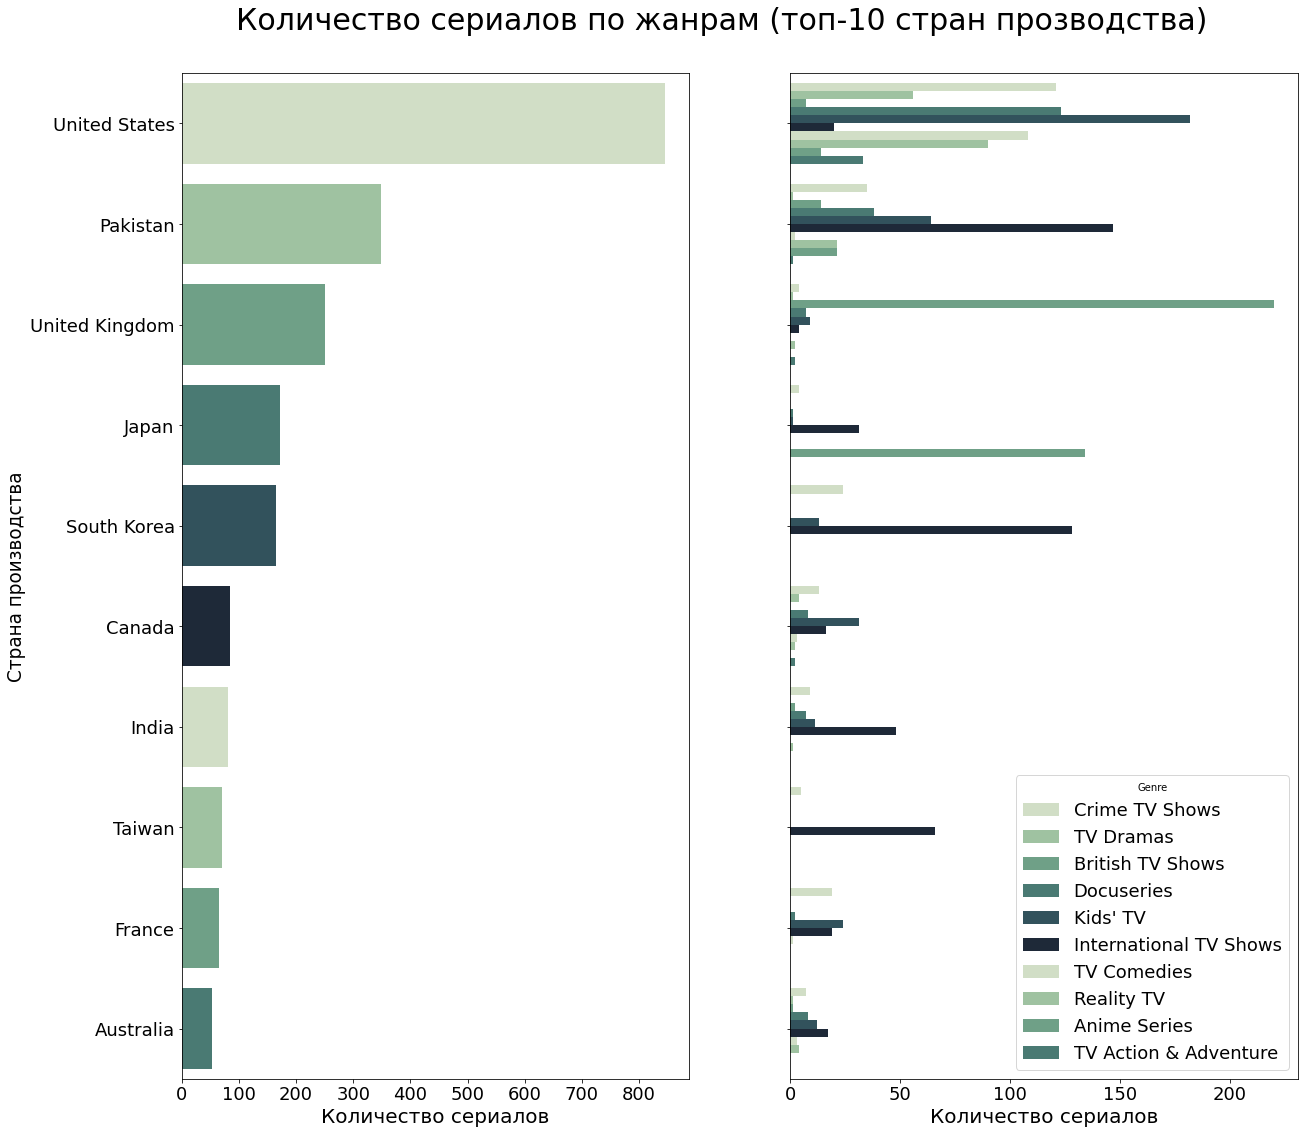

In [26]:
figure, axes = plt.subplots(1, 2, sharey = True)
figure.suptitle('Количество сериалов по жанрам (топ-10 стран прозводства)', fontsize = '30', color = 'black', y = 0.93)
figure.set_size_inches(20, 16)

#THE LEFT ONE

my_color = sns.cubehelix_palette(start = 6, rot = -0.5)
axes[0] = sns.barplot(data = countries_final, x = countries_final['counter'], y = countries_final['countries'], 
                      ax = axes[0],  palette = my_color)

axes[0].set_ylabel('Страна производства', fontsize = 18.5)
axes[0].set_xlabel('Количество сериалов', fontsize = 20)
#axes[0].set_title('Количество сериалов (топ-10 стран прозводства)', fontsize = 20)


#THE RIGHT ONE

order1 = df_series.groupby('listed_in1').count().sort_values(by = 'show_id', ascending = False)[0:10].index
df_series_f = df_series[df_series['listed_in1'].isin(order1)]
order2 = df_series_f.groupby('country').count().sort_values(by = 'show_id', ascending = False)[0:10].index
df_series_f = df_series_f[df_series_f['country'].isin(order2)]

axes[1] = sns.countplot(data = df_series_f, y = 'country', ax = axes[1], hue = 'listed_in1', palette = my_color, order = order2)
axes[1].set_ylabel('Страна производства', fontsize = 18, color = 'white')
axes[1].set_xlabel('Количество сериалов', fontsize = 20)
#axes[1].set_title('Количество сериалов по жанрам (топ-10 стран прозводства)', fontsize = 20)

axes[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 18)

axes[1].legend(title = 'Genre', loc = 'lower right', fontsize = 18)

figure.set_size_inches(20, 18.5)

plt.savefig('subplots_country_series.png', transparent = True)

Неудивительно, что большинство сериалов, которые транслируются на платформе, были произведены в США. Однако достаточно неожиданным стал вывод о том, что страной со вторым по величине производством стал Пакистан.

Самыми популярными телевизионными жанрами в целом, по-видимому, являются детское телевидение и зарубежные сериалы. Учитывая, что Netflix - американская компания, под зарубежными сериалами стоит понимать сериалы, произведенные за пределами США.

В США производится сериалы разных категорий, но больше всего - боевики и приключенческие сериалы, детективы и комедийные сериалы.

В Пакистане и Южной Корее наиболее популярными в производстве жанрами были зарубежные (неамериканские) сериалы и детское телевидение.

А Великобритания и Япония имеют самое большое производство мультипликационных сериалов.

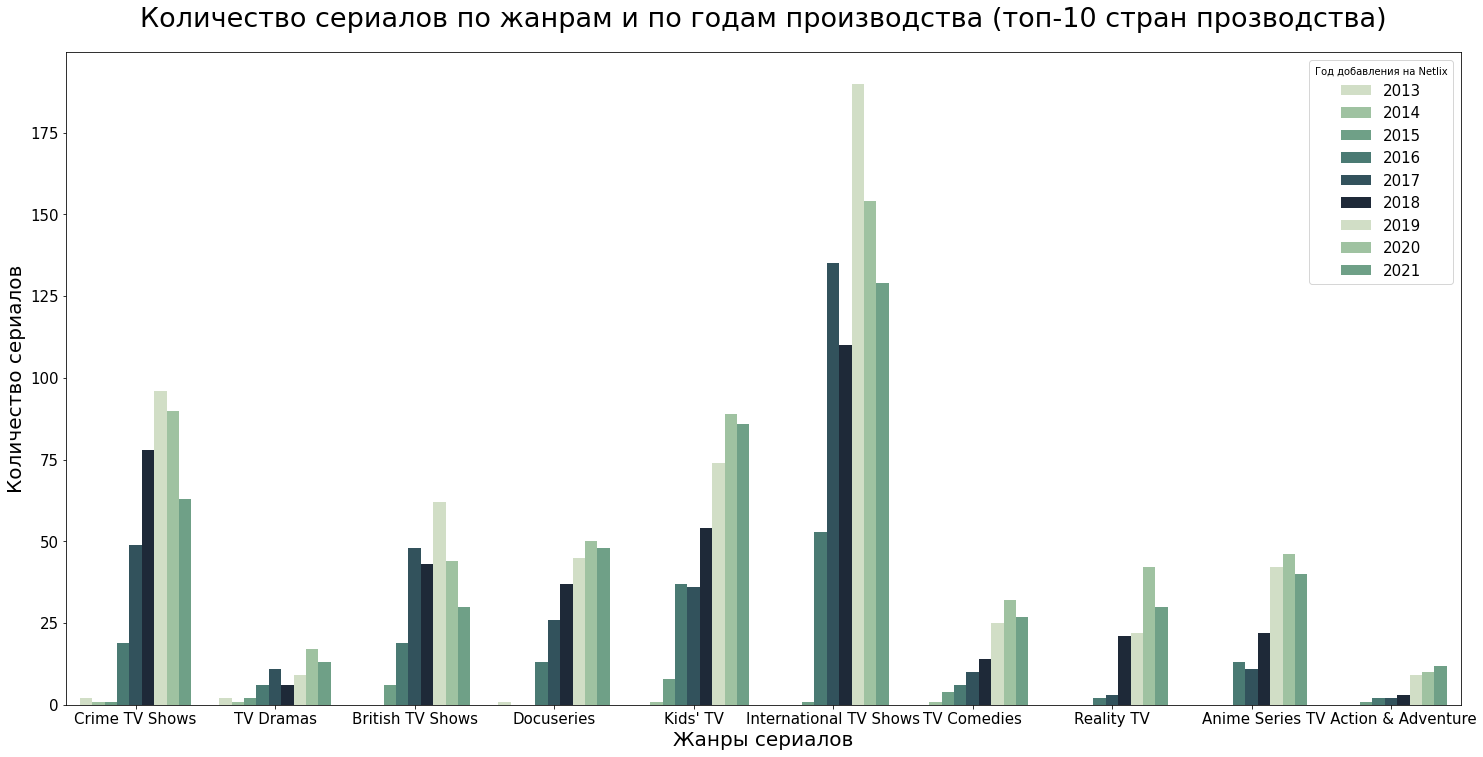

In [27]:
plt.figure(figsize = [25, 12])

my_color = sns.cubehelix_palette(start = 6, rot = -0.5)

sort_order = df_series.groupby('listed_in1').count().sort_values(by = 'show_id',ascending = False)[0:10].index
df_series_g = df_series[df_series['listed_in1'].isin(sort_order)]

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
series_g = sns.countplot(data = df_series_g, x = 'listed_in1', hue = df_series_g['date_added'].dt.year, palette = my_color)
series_g.set_xlabel('Жанры сериалов',fontsize = 20)
series_g.set_ylabel('Количество сериалов',fontsize = 20)
series_g.set_title('Количество сериалов по жанрам и по годам производства (топ-10 стран прозводства)', fontsize = 27, y = 1.03)
plt.legend(title = 'Год добавления на Netlix', loc = 'upper right', fontsize = 15)

plt.savefig('genre_year_series.png', transparent = True)

Проанализируем измения количества производимых по годам сериалов в зависимости от жанра, к которому они отнесены.

Пандемия повлияла на производство сериалов почти всех жанров, незначительно возросло число приключенческих сериалов, что скорее всего связано с тем, что этот довольно новый жанр стал пользоваться спросом в последние годы, в связи с чем вполне возможно, что последствия пандемии сказались и на нем, но в меньшей степени. 

Меньше всего от пандемии пострадали жанры документальных сериалов, детские сериалы, мультипликационные сериалы.